In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('BreastCancerWc.csv',header=None)

In [125]:
df.columns =['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [126]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [127]:
df.replace('?',pd.NA,inplace=True)

In [128]:
df.isna().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [130]:
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0])

In [131]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [132]:
import seaborn as sns

<Axes: >

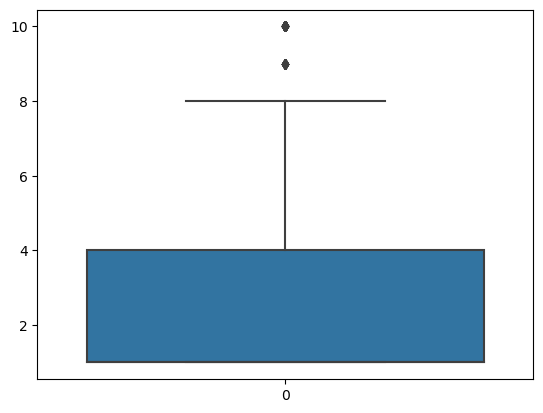

In [133]:
sns.boxplot(df['Normal Nucleoli'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [135]:
df['Normal Nucleoli'] = df['Normal Nucleoli'].astype(float)

In [136]:
lower_limit = df['Normal Nucleoli'].mean()-2*df['Normal Nucleoli'].std()
upper_limit = df['Normal Nucleoli'].mean()+2*df['Normal Nucleoli'].std()
print(lower_limit)
print(upper_limit)

-3.240314997525938
8.974220576925081


In [137]:
outliers = df.loc[(df['Normal Nucleoli']>upper_limit) |(df['Normal Nucleoli']<lower_limit)]

In [138]:
print(len(df))

699


In [139]:
print(len(outliers))

77


In [140]:
outliers.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
21,1054593,10,5,5,3,6,7,7,10.0,1,4
36,1080185,10,10,10,8,6,1,8,9.0,1,4
44,1103608,10,10,10,4,8,1,8,10.0,1,4
52,1110102,10,3,6,2,3,5,4,10.0,2,4
56,1112209,8,10,10,1,3,6,3,9.0,1,4


In [141]:
newdf= df.loc[(df['Normal Nucleoli']<upper_limit)&(df['Normal Nucleoli']>lower_limit)]

In [142]:
len(newdf)

622

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
label_encoder = LabelEncoder()

In [145]:
newdf['Class'].unique()

array([2, 4], dtype=int64)

In [146]:
newdf.loc[newdf['Class']==2,'Class']='Y'
newdf.loc[newdf['Class']==4,'Class']='N'

In [147]:
newdf.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1.0,1,Y
1,1002945,5,4,4,5,7,10,3,2.0,1,Y
2,1015425,3,1,1,1,2,2,3,1.0,1,Y
3,1016277,6,8,8,1,3,4,3,7.0,1,Y
4,1017023,4,1,1,3,2,1,3,1.0,1,Y


In [149]:
newdf['Class']=label_encoder.fit_transform(newdf['Class'])

C:\Users\adwai\AppData\Local\Temp\ipykernel_30020\2579555943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Class']=label_encoder.fit_transform(newdf['Class'])


In [150]:
newdf.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1.0,1,1
1,1002945,5,4,4,5,7,10,3,2.0,1,1
2,1015425,3,1,1,1,2,2,3,1.0,1,1
3,1016277,6,8,8,1,3,4,3,7.0,1,1
4,1017023,4,1,1,3,2,1,3,1.0,1,1


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [152]:
X= newdf.drop('Class',axis=1)
y= newdf['Class']

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [154]:
lm=LinearRegression()

In [155]:
lm.fit(X_train,y_train)

LinearRegression()

In [156]:
print(accuracy_score(y_test,lm_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets